In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable

# Relative import of code from distiller, w/o installing the package
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import distiller
import models
from apputils import *

## Performance overview



In [2]:
model = models.create_model(pretrained=False, dataset='imagenet', arch='resnet50', parallel=False)

In [3]:
dummy_input = Variable(torch.randn(1, 3, 224, 224), requires_grad=False)
df = distiller.model_performance_summary(model, dummy_input, batch_size=1)
display(df)

total_macs = df['MACs'].sum()

print("Total MACs: " + "{:,}".format(total_macs))

,Name,Type,Attrs,IFM,IFM volume,OFM,OFM volume,Weights volume,MACs
0,conv1,Conv2d,"k=(7, 7)","(1, 3, 224, 224)",150528,"(1, 64, 112, 112)",802816,9408,118013952
1,layer1.0.conv1,Conv2d,"k=(1, 1)","(1, 64, 56, 56)",200704,"(1, 64, 56, 56)",200704,4096,12845056
2,layer1.0.conv2,Conv2d,"k=(3, 3)","(1, 64, 56, 56)",200704,"(1, 64, 56, 56)",200704,36864,115605504
3,layer1.0.conv3,Conv2d,"k=(1, 1)","(1, 64, 56, 56)",200704,"(1, 256, 56, 56)",802816,16384,51380224
4,layer1.0.downsample.0,Conv2d,"k=(1, 1)","(1, 64, 56, 56)",200704,"(1, 256, 56, 56)",802816,16384,51380224
5,layer1.1.conv1,Conv2d,"k=(1, 1)","(1, 256, 56, 56)",802816,"(1, 64, 56, 56)",200704,16384,51380224
6,layer1.1.conv2,Conv2d,"k=(3, 3)","(1, 64, 56, 56)",200704,"(1, 64, 56, 56)",200704,36864,115605504
7,layer1.1.conv3,Conv2d,"k=(1, 1)","(1, 64, 56, 56)",200704,"(1, 256, 56, 56)",802816,16384,51380224
8,layer1.2.conv1,Conv2d,"k=(1, 1)","(1, 256, 56, 56)",802816,"(1, 64, 56, 56)",200704,16384,51380224
9,layer1.2.conv2,Conv2d,"k=(3, 3)","(1, 64, 56, 56)",200704,"(1, 64, 56, 56)",200704,36864,115605504


Total MACs: 4,089,184,256


### Let's take a look at how our compute is distibuted:

In [4]:
print("MAC distribution:")
counts = df['MACs'].value_counts()
print(counts)

MAC distribution:
51380224     29
115605504    16
102760448     6
2048000       1
12845056      1
118013952     1
Name: MACs, dtype: int64


### Let's look at which convolutions kernel sizes we're using, and how many instances:

In [5]:
print("Convolution kernel size distribution:")
counts = df['Attrs'].value_counts()
print(counts)

Convolution kernel size distribution:
k=(1, 1)    36
k=(3, 3)    16
k=(7, 7)     1
             1
Name: Attrs, dtype: int64


### Let's look at how the MACs are distributed between the layers and the convolution kernel sizes

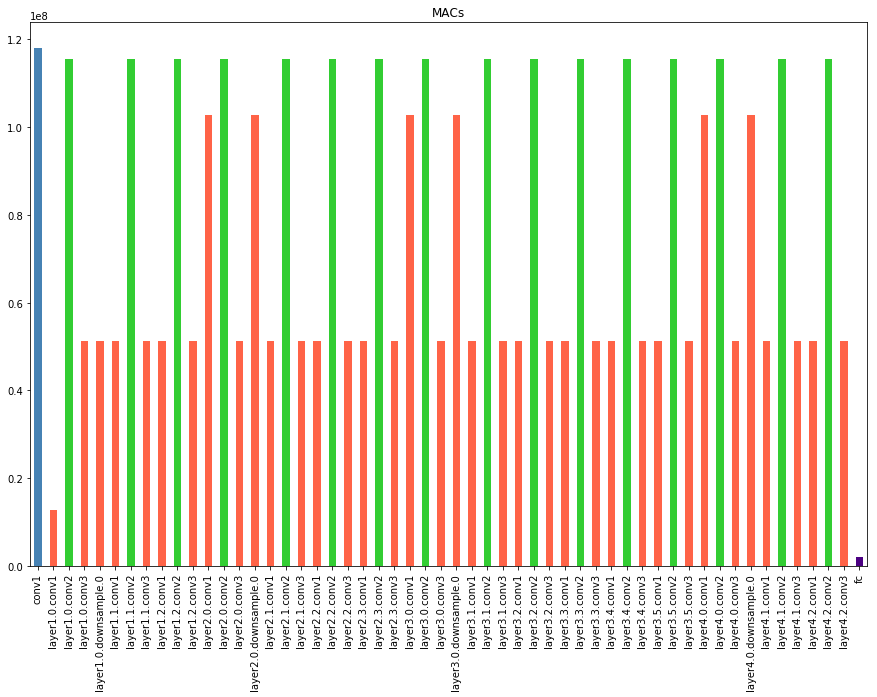

In [11]:
def get_layer_color(layer_type, attrs):
    if layer_type == "Conv2d":
        if attrs == 'k=(1, 1)':
            return 'tomato'
        elif attrs == 'k=(3, 3)':
            return 'limegreen'
        else:
            return 'steelblue'
    return 'indigo'

df_compute = df['MACs']
ax = df_compute.plot.bar(figsize=[15,10], title="MACs", 
                         color=[get_layer_color(layer_type, attrs) for layer_type,attrs in zip(df['Type'], df['Attrs'])])

ax.set_xticklabels(df.Name, rotation=90);

### How do the Weights and Feature-maps footprints distribute across the layers:

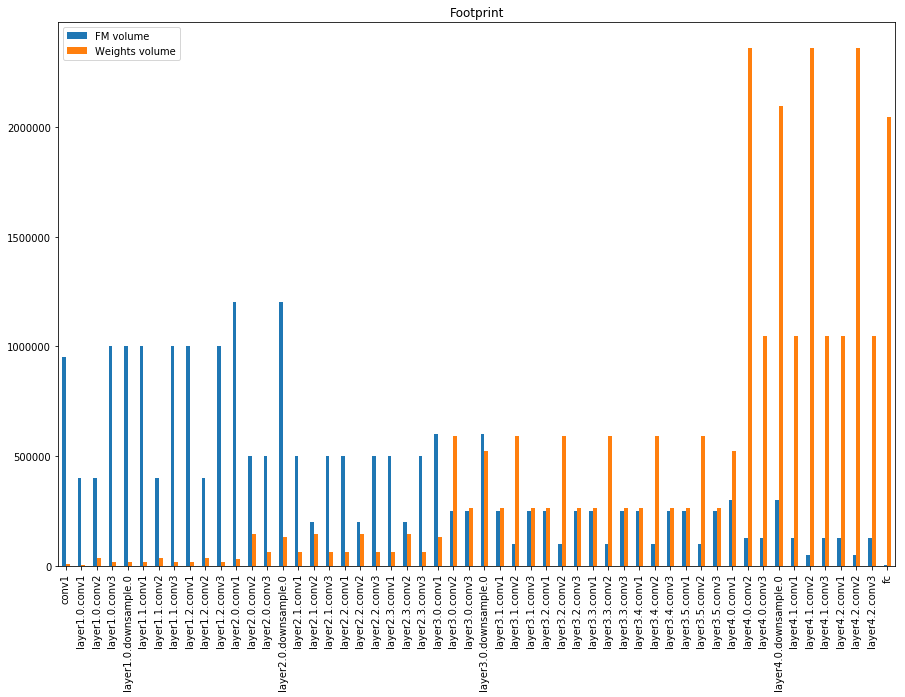

In [7]:
df['FM volume'] = df['IFM volume'] + df['OFM volume']
df_footprint = df[['FM volume', 'Weights volume']]
ax = df_footprint.plot.bar(figsize=[15,10], title="Footprint");
ax.set_xticklabels(df.Name, rotation=90);

### How the Arithmetic Intensity distributes across the layers:

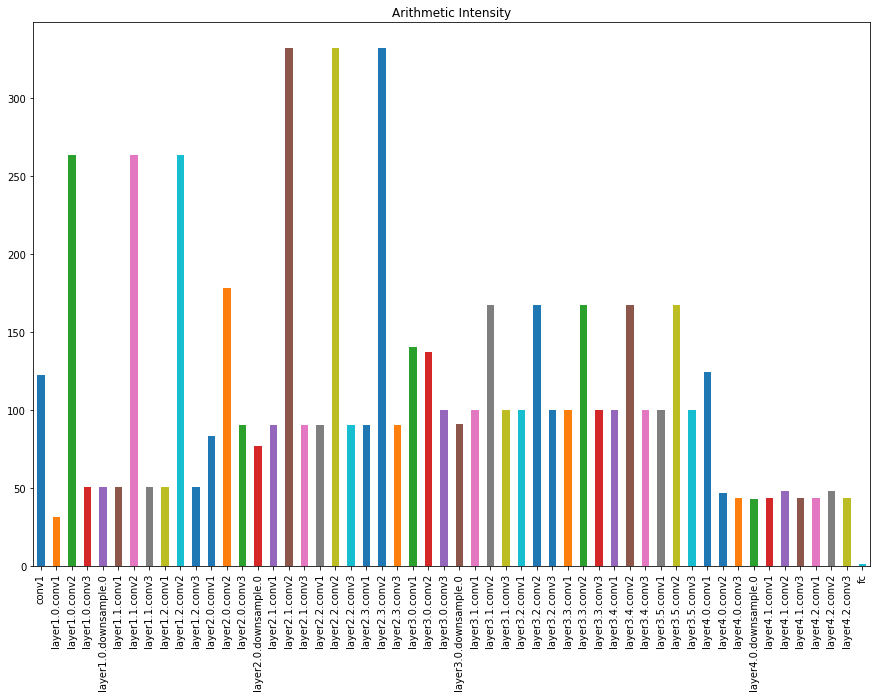

In [8]:
df_performance = df
df_performance['raw traffic'] = df_footprint['FM volume'] + df_footprint['Weights volume']
df_performance['arithmetic intensity'] = df['MACs'] / df_performance['raw traffic']
df_performance2 = df_performance['arithmetic intensity']
ax = df_performance2.plot.bar(figsize=[15,10], title="Arithmetic Intensity");
ax.set_xticklabels(df.Name, rotation=90);

## ResNet20 channel pruning using SSL

Let's see how many MACs we saved by using SSL to prune filters from ResNet20:

In [9]:
resnet20_dense = models.create_model(pretrained=False, dataset='cifar10', arch='resnet20_cifar', parallel=True)
resnet20_sparse = models.create_model(pretrained=False, dataset='cifar10', arch='resnet20_cifar', parallel=True)
checkpoint_file = "../examples/ssl/checkpoints/checkpoint_trained_channel_regularized_resnet20_finetuned.pth.tar" 
load_checkpoint(resnet20_sparse, checkpoint_file);

RuntimeError: cuda runtime error (35) : CUDA driver version is insufficient for CUDA runtime version at torch/csrc/cuda/Module.cpp:51

In [10]:
dummy_input = Variable(torch.randn(1, 3, 32, 32), requires_grad=False)
df_dense = distiller.model_performance_summary(resnet20_dense, dummy_input, batch_size=1)
df_sparse = distiller.model_performance_summary(resnet20_sparse, dummy_input, batch_size=1)

dense_macs = df_dense['MACs'].sum()
sparse_macs = df_sparse['MACs'].sum()

print("Dense MACs: " + "{:,}".format(int(dense_macs)))
print("Sparse MACs: " + "{:,}".format(int(sparse_macs)))
print("Saved MACs: %.2f%%" % ((1 - sparse_macs/dense_macs)*100))

Dense MACs: 40,813,184
Sparse MACs: 40,813,184
Saved MACs: 0.00%
